# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load the Data

In [2]:
df=pd.read_csv('/content/Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [4]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [5]:
df.sample(15)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
28730,83302,200520J071501,391580.0,287630.0,-2.125438,52.486492,20,3,2.0,1,...,4180.0,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01009754,2005.0
17986,81546,200520G044002,392430.0,296040.0,-2.113114,52.562111,20,3,2.0,1,...,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01010430,2005.0
49951,35673,200505BS00572,334820.0,417000.0,-2.987487,53.645425,5,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01007058,2005.0
32260,74419,2005160C02570,519570.0,428530.0,-0.188593,53.739443,16,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01013097,2005.0
4819,57371,200511AL16310,422220.0,532500.0,-1.656838,54.687077,11,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,2.0,Yes,E01020821,2005.0
44019,85985,200520M083803,434350.0,280420.0,-1.496332,52.420666,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Unknown,Dry,1.0,No,E01009572,2005.0
3065,25209,200501YR99007,533630.0,190320.0,-0.072146,51.595831,1,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01001978,2005.0
19197,46277,200506P023873,388060.0,412980.0,-2.181960,53.613226,6,3,2.0,3,...,6452.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,E01005592,2005.0
37891,33993,200504FL05071,381160.0,422260.0,-2.286823,53.696432,4,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01025385,2005.0
10648,91462,200522DE44453,404230.0,267340.0,-1.939397,52.304130,22,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01032239,2005.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [7]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [8]:
df.shape

(52000, 30)

In [11]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n" + "-"*40 + "\n")

Unique values in 'Unnamed: 0':
[88245 78422 19574 ...   437 61353 75359]

----------------------------------------

Unique values in 'Accident_Index':
['2.01E+12' '200520D303703' '200501TX20137' ... '20053102C2156'
 '200501BS70452' '2005160D02810']

----------------------------------------

Unique values in 'Location_Easting_OSGR':
[381880. 413520. 516260. ... 460040. 511930. 509970.]

----------------------------------------

Unique values in 'Location_Northing_OSGR':
[298700. 284740. 177370. ... 452300. 245160. 515740.]

----------------------------------------

Unique values in 'Longitude':
[-2.268891 -1.802453 -0.327073 ... -0.178465 -1.591972 -0.334114]

----------------------------------------

Unique values in 'Latitude':
[52.585773 52.460412 51.48329  ... 51.482604 54.068547 53.740566]

----------------------------------------

Unique values in 'Police_Force':
[21 20  1 14 31  4  3 30  5  6 13 22 48  7 12 16 10 11 32 23 17]

----------------------------------------

Unique valu

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [13]:
#fill null values caues it is better to fill not drop since the missing is a little

df['Number_of_Vehicles'] = df['Number_of_Vehicles'].transform(lambda x: x.fillna(x.mode()[0]))
df['Day_of_Week'] = df['Day_of_Week'].transform(lambda x: x.fillna(x.mode()[0]))
df['Time'].fillna('Unknown', inplace=True)
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].transform(lambda x: x.fillna(x.mode()[0]))
df['Local_Authority_(Highway)'].fillna('Unknown', inplace=True)
df['1st_Road_Class'] = df['1st_Road_Class'].transform(lambda x: x.fillna(x.mode()[0]))
df['1st_Road_Number'] = df['1st_Road_Number'].transform(lambda x: x.fillna(x.mode()[0]))
df['Speed_limit'] = df['Speed_limit'].transform(lambda x: x.fillna(x.mode()[0]))
df['Road_Type'].fillna('Unknown', inplace=True)
df['2nd_Road_Class'] = df['2nd_Road_Class'].transform(lambda x: x.fillna(x.mode()[0]))
df['2nd_Road_Number'] = df['2nd_Road_Number'].transform(lambda x: x.fillna(x.mode()[0]))
df['Pedestrian_Crossing-Human_Control'].fillna('other', inplace=True)
df['Pedestrian_Crossing-Physical_Facilities'].fillna('other', inplace=True)
df['Light_Conditions'].fillna('Unknown', inplace=True)
df['Weather_Conditions'].fillna('Unknown', inplace=True)
df['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].transform(lambda x: x.fillna(x.mode()[0]))
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)
df['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)
df['Year'] = df['Year'].transform(lambda x: x.fillna(x.mode()[0]))





In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [17]:
df.duplicated().sum()

#there is no duplicate values

0

In [74]:
#scale the dataset
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Local_Authority_(District)', '1st_Road_Number', '2nd_Road_Number','Longitude','Latitude' ]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [75]:
#using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca= pca.fit_transform(df[columns_to_scale])

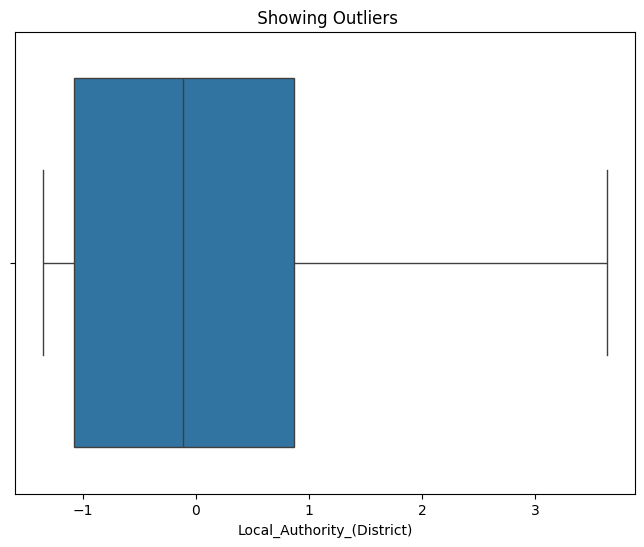

In [22]:
#looking for outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Local_Authority_(District)'])

plt.title(' Showing Outliers')
plt.xlabel('Local_Authority_(District)')
plt.show()

#no outliers

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [76]:
features = ['Longitude', 'Latitude']


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

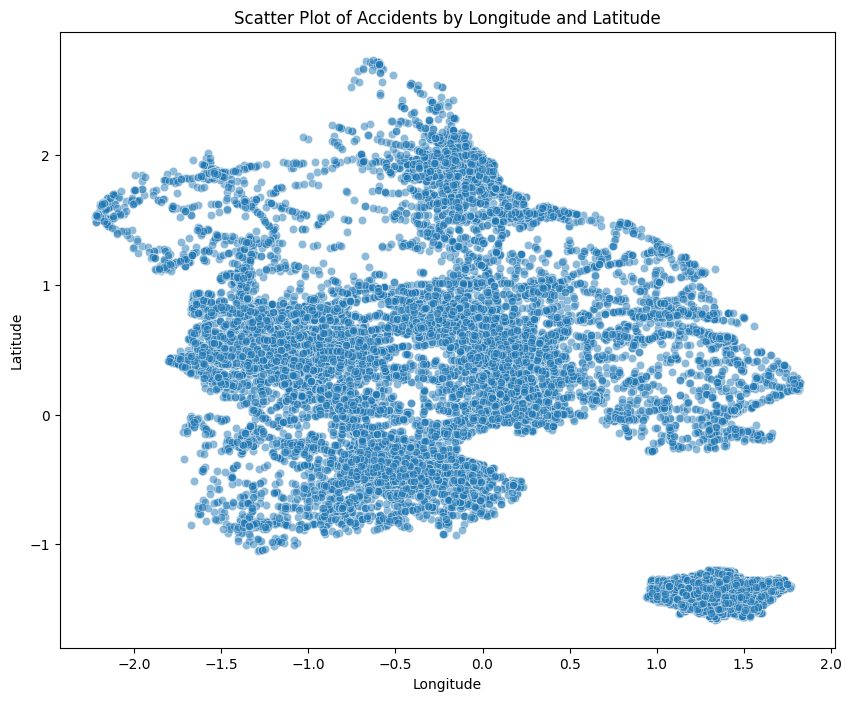

In [77]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [69]:
from sklearn.cluster import KMeans
features = ['Longitude', 'Latitude']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

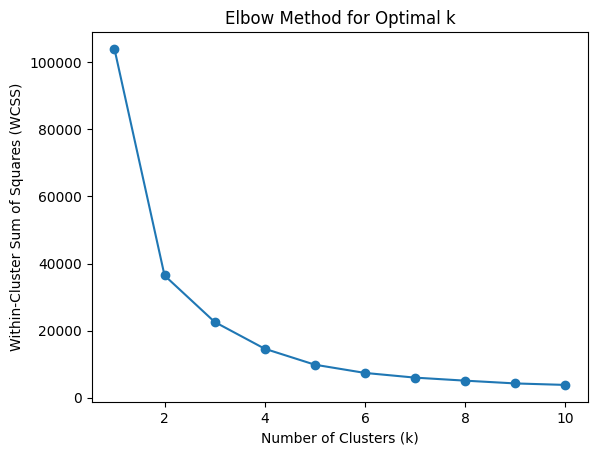

In [70]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()
# the optimal k is 3 based on the chart

In [71]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       88245       2.01E+12               381880.0                298700.0   
1       78422  200520D303703               413520.0                284740.0   
2       19574  200501TX20137               516260.0                177370.0   
3       79337  200520E097001               401530.0                282610.0   
4       89121       2.01E+12               421760.0                320680.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -2.268891  52.585773            21                  3                 2.0   
1  -1.802453  52.460412            20                  2                 1.0   
2  -0.327073  51.483290             1                  3                 2.0   
3  -1.978930  52.441426            20                  3                 2.0   
4  -1.678823  52.783240            21                  3                 1.0   

   Number_of_Casualties  ... Pedestrian_Cros

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [72]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette = silhouette_score(X_scaled, df['cluster'])
print("Silhouette Score:", silhouette)
calinski_harabasz = calinski_harabasz_score(X_scaled, df['cluster'])
print("Calinski-Harabasz Index:", calinski_harabasz)


Silhouette Score: 0.5210015140897829
Calinski-Harabasz Index: 93712.78097021086


## Plot the data points with their predicted cluster center

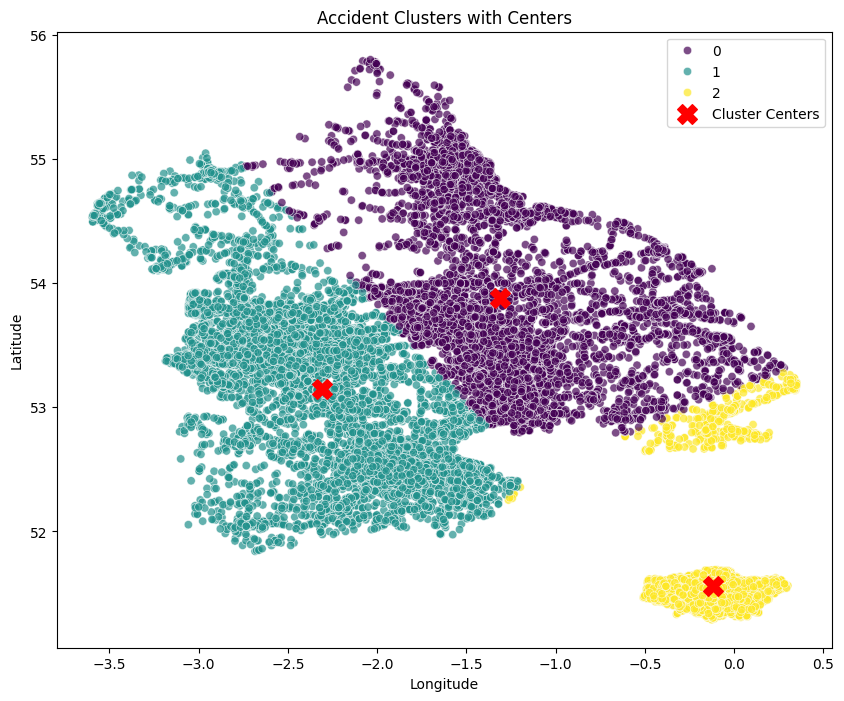

In [73]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=df, palette='viridis', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')
plt.title('Accident Clusters with Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
answer: since we need to specify accident by their location, i choosed 4 features i think it is neccessory to give us an insights and provide accuracy, i choosed the following features:
Longitude and Latitude: These are essential for geographical clustering.
Speed_limit: Different speed limits might indicate different road types and areas which could influence accident patterns.
Urban_or_Rural_Area: Accidents might have distinct characteristics in urban vs. rural settings.

* **Number of Clusters Choices:**
   - How did you determine the optimal number?

   Answer: by using elbow method i choosed the optimal K which is 3

* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
  Answer: Silhouette and calinski_harabasz, to be honest i practiced on these two and i dont remember it.

   - How do these metrics help in understanding the effectiveness of your clustering approach?
   Answer: yeah it seems like it is work with my clusters and make 3 seperate clusters
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
   Answer: using plotly to dosplay a real map for my clusters the is and advice from our instructor and i like it and i will use it inshallah!